In [46]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import Imputer

from sklearn import preprocessing
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy.stats import norm, skew
os.getcwd()

train=pd.read_csv("train.csv",sep=",")
test=pd.read_csv("test.csv",sep=",")

sample_submission=pd.read_table("sample_submission.csv",  sep=",")
#train.head(),train.shape,print(len(train))
y = train.SalePrice
X = train.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object']) 
X = X.drop("Id", axis = 1)

test = test.select_dtypes(exclude=['object'])
test_id = test['Id']
test.drop("Id",axis=1 ,inplace=True)
#print(test)
#print(X.shape)
#print(y.shape)
#print(X.columns)
#print(test.columns)
#X = train.drop(['Id'], axis=1)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25)
#print(X)

#my_imputer = Imputer()
#train_X = my_imputer.fit_transform(train_X)
#test_X = my_imputer.transform(test_X)



In [136]:
from xgboost import XGBRegressor
my_model = XGBRegressor()
my_model.fit(train_X, train_y)#n_estimators=10000

y_pred1 = my_model.predict(test_X)
#print('R2:%.2f'%my_model.r2_score(y_pred1, test_y))

from sklearn.metrics import accuracy_score, mean_absolute_error 
print(mean_absolute_error(y_pred1, test_y)) 
print(my_model.score(test_X, test_y))


y_pred1 = my_model.predict(test_X)

17947.0477739726
0.8688378659773428


In [137]:
ans = my_model.predict(test)

In [138]:
def exportCSV (idset, dataset):
    df = pd.DataFrame(dict(Id=idset,SalePrice=dataset))
    df.to_csv('prediction.csv', sep=',', encoding='utf-8',index=False);

In [139]:
exportCSV(test_id,ans)

LotFrontage      259
Alley           1369
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
MiscFeature     1406
dtype: int64


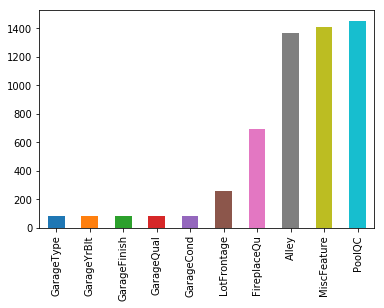

In [4]:
#計算缺失值欄位
missing = train.isnull().sum()
missing = missing[missing>80]
print(missing)
missing.sort_values(inplace=True)
missing.plot.bar()

In [3]:
#補缺失值
No_Thing_ob = ["Fence"]

for columns in No_Thing_ob:
    train[columns] = train[columns].fillna("NO_")

LotFrontage     259
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


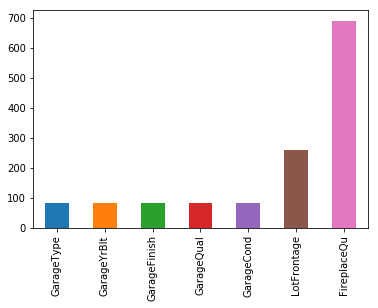

In [41]:
#刪除過多缺失值的欄位
train_drop=train.dropna(axis='columns', thresh=500)
#計算缺失值欄位
missing = train_drop.isnull().sum()
missing = missing[missing>80]
print(missing)
missing.sort_values(inplace=True)
missing.plot.bar()



In [165]:
train_drop.shape

(1460, 77)

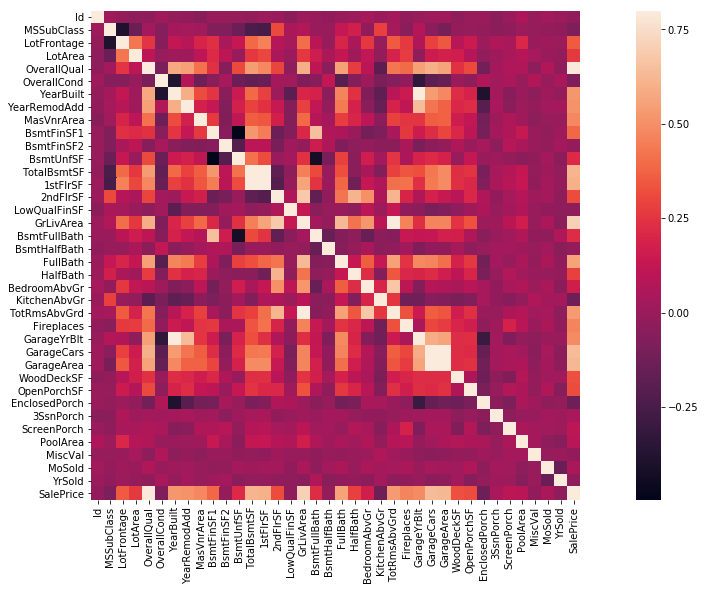

In [183]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)

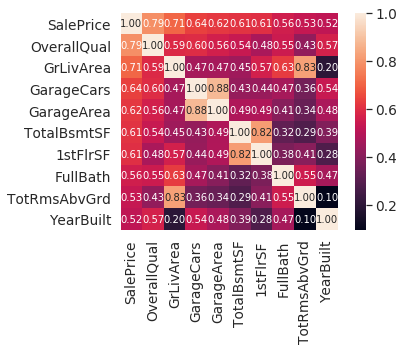

In [194]:
k  = 10 # 关系矩阵中将显示10个特征
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, \
                 square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

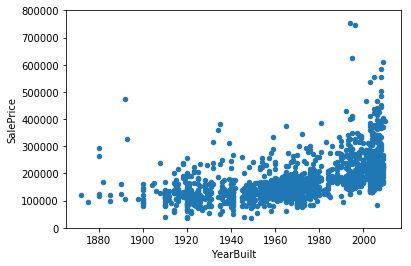

In [48]:
# YearBuilt  scatter
var = 'YearBuilt'
data = pd.concat([y, train[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

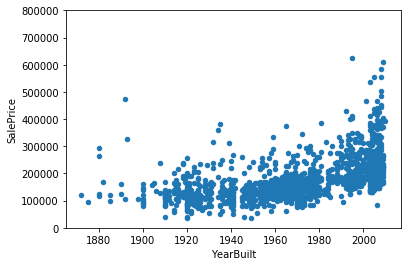

In [49]:
train_drop=train_drop[train_drop['SalePrice'] < 700000]
# YearBuilt  scatter
var = 'YearBuilt'
data = pd.concat([y, train_drop[var]], axis=1)
data.plot.scatter(x=var, y="SalePrice", ylim=(0, 800000))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


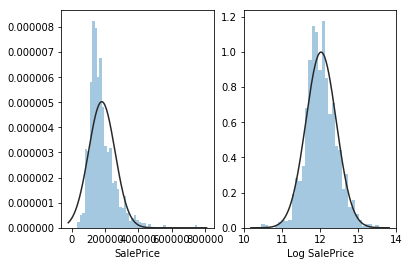

In [24]:
plt.subplot(1, 2, 1)
sns.distplot(y, kde=False, fit = norm)

plt.subplot(1, 2, 2)
sns.distplot(np.log1p(y), kde=False, fit = norm)
plt.xlabel('Log SalePrice')
plt.show()